In [87]:
import seaborn as sns

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchsummary import summary
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("C:/Ai-class/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [91]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

                               결측치 개수  결측치 비율(%)
Patient_Number                      0        0.0
Blood_Pressure_Abnormality          0        0.0
Level_of_Hemoglobin                 0        0.0
Genetic_Pedigree_Coefficient       92        4.6
Age                                 0        0.0
BMI                                 0        0.0
Sex                                 0        0.0
Pregnancy                        1558       77.9
Smoking                             0        0.0
Physical_activity                   0        0.0
salt_content_in_the_diet            0        0.0
alcohol_consumption_per_day       242       12.1
Level_of_Stress                     0        0.0
Chronic_kidney_disease              0        0.0
Adrenal_and_thyroid_disorders       0        0.0


In [93]:
# 결측치를 평균 나이로 채우기 
df["Pregnancy"] = df["Pregnancy"].fillna(0)  # 임신여부 결측치 0으로 체체
df["Genetic_Pedigree_Coefficient"] = df["Genetic_Pedigree_Coefficient"].fillna(0)  # 가족력 > 0으로 매
df["alcohol_consumption_per_day"] = df["alcohol_consumption_per_day"].fillna(0)  # 알콜 섭취량은 평균값 또는 0으로 체체

print(df[["Pregnancy", "Genetic_Pedigree_Coefficient", "alcohol_consumption_per_day"]])

      Pregnancy  Genetic_Pedigree_Coefficient  alcohol_consumption_per_day
0           1.0                          0.90                          0.0
1           0.0                          0.23                        205.0
2           0.0                          0.91                         67.0
3           0.0                          0.43                        242.0
4           0.0                          0.83                        397.0
...         ...                           ...                          ...
1995        0.0                          0.02                        144.0
1996        1.0                          1.00                          0.0
1997        0.0                          0.22                          0.0
1998        0.0                          0.72                        253.0
1999        0.0                          0.09                        230.0

[2000 rows x 3 columns]


Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64
Blood_Pressure_Abnormality
0    50.65
1    49.35
Name: proportion, dtype: float64


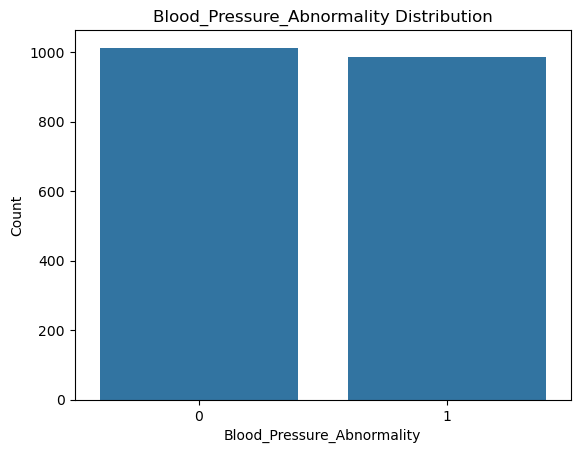

In [95]:
# 레이블 분포 확인
print(df["Blood_Pressure_Abnormality"].value_counts())  # 클래스 개수 출력
print(df["Blood_Pressure_Abnormality"].value_counts(normalize=True) * 100)  # 비율(%) 출력

# 시각화
sns.countplot(x="Blood_Pressure_Abnormality", data=df)
plt.title("Blood_Pressure_Abnormality Distribution")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("Count")
plt.show()

In [97]:
# 삭제할 칼럼 지정
df.drop(columns=['Patient_Number'], inplace=True)

# 변경된 데이터프레임 확인
df

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0
1996,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1
1997,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1
1998,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1


In [99]:
# 데이터와 타겟 분리
X = df.drop(['Blood_Pressure_Abnormality'], axis=1).values
y = df['Blood_Pressure_Abnormality'].values

In [101]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 13), (400, 13), (1600,), (400,))

In [107]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [109]:
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [111]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

In [113]:
np.bincount(y)

array([1013,  987], dtype=int64)

In [115]:
class BFDense(nn.Module):
    def __init__(self):
        super(BFDense, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1) 
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = BFDense()

In [117]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [119]:
# 학습
num_epochs = 30
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_dataloader))

    # 테스트 정확도 계산
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            predicted = (probs >= 0.5).float()
            total += labels.size(0)
            correct += (predicted.int() == labels.int()).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/30, Loss: 0.6884, Accuracy: 53.50%
Epoch 2/30, Loss: 0.6823, Accuracy: 58.25%
Epoch 3/30, Loss: 0.6759, Accuracy: 61.75%
Epoch 4/30, Loss: 0.6689, Accuracy: 65.00%
Epoch 5/30, Loss: 0.6611, Accuracy: 69.25%
Epoch 6/30, Loss: 0.6524, Accuracy: 71.25%
Epoch 7/30, Loss: 0.6428, Accuracy: 72.50%
Epoch 8/30, Loss: 0.6324, Accuracy: 72.75%
Epoch 9/30, Loss: 0.6216, Accuracy: 72.75%
Epoch 10/30, Loss: 0.6106, Accuracy: 73.00%
Epoch 11/30, Loss: 0.5998, Accuracy: 73.25%
Epoch 12/30, Loss: 0.5890, Accuracy: 73.25%
Epoch 13/30, Loss: 0.5790, Accuracy: 73.50%
Epoch 14/30, Loss: 0.5696, Accuracy: 74.00%
Epoch 15/30, Loss: 0.5614, Accuracy: 74.75%
Epoch 16/30, Loss: 0.5536, Accuracy: 74.25%
Epoch 17/30, Loss: 0.5469, Accuracy: 74.50%
Epoch 18/30, Loss: 0.5410, Accuracy: 74.50%
Epoch 19/30, Loss: 0.5358, Accuracy: 74.75%
Epoch 20/30, Loss: 0.5313, Accuracy: 74.50%
Epoch 21/30, Loss: 0.5274, Accuracy: 74.50%
Epoch 22/30, Loss: 0.5236, Accuracy: 74.75%
Epoch 23/30, Loss: 0.5205, Accuracy: 75.0

In [121]:
# 평가
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        predicted = (probs >= 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Specificity 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[153  55]
 [ 43 149]]
F1 Score: 0.76
Precision: 0.76
Recall: 0.76
Specificity: 0.76


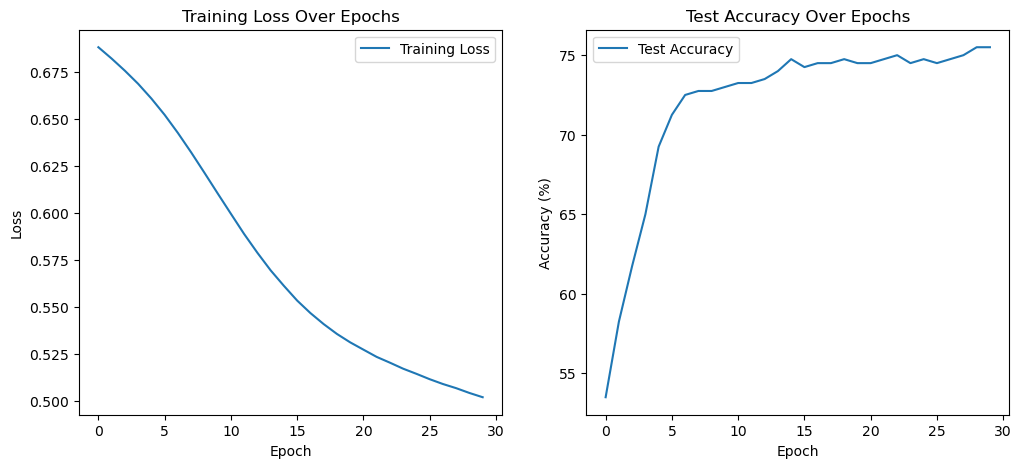

In [123]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()